#Biologically-Inspired Computation: Coursework 2 : Particle Swarm Optimisation#

##Requirements##

In [1]:
!pip install optproblems

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 5.0 MB/s 
  Created wheel for optproblems: filename=optproblems-1.3-py3-none-any.whl size=2040688 sha256=65882d9c13aefe5dd5df44cdf1bd96b78da7bcc3b90ed6ea260e60124e0188ff
  Stored in directory: /root/.cache/pip/wheels/3a/8d/1b/762402c6cbdfd012cf3622d55b6460440d90dafe59dad0c013
Successfully built optproblems


In [2]:
import sys
import matplotlib.pyplot as plt
import optproblems
from optproblems import cec2005
from optproblems import *
import random
from random import random,randint


##PSO Functions Definition##

In [3]:
def getFitness(x):
  Function.batch_evaluate(x)  #Evaluate the whole swarm

In [4]:
def find_best_individual(Best_pos_Ind, position_individual, count):
  if count == 0:
    Best_pos_Ind = position_individual
  if Best_pos_Ind.objective_values >= position_individual.objective_values:
    Best_pos_Ind = position_individual
  return Best_pos_Ind

In [5]:
def find_best_informant(Informants_Nb, Informants, position, position_individual, count, Swarmsize):
  Best_pos_Inf = position_individual
  for i in Informants_Nb:
    if position[i].objective_values <= position_individual.objective_values:
      Best_pos_Inf = position[i]
  return Best_pos_Inf

##PSO Parameters##

In [16]:
Swarmsize =   50             #Desired Swarm Size (10-100)
Alpha =   0.7                #Proportion of velocity to be retained 
Beta =  1.3                    #Proportion of personal best to be retained  (Usually not to large)
Gamma = 1                  #Proportion of the informant's best to be retained  (Usually between Beta and Delta)
Delta = 0                   #Proportion of the global best to be retained   (usually 0 )
Epsilon =  1                 #Jump size of a particle    ( usually 1)
bound = [-100,100]           #Bound of the Function TO CHANGE IF DIFFERENT BOUND
maxiteration = 10000          #Maximum number of iterations
Informants = 7               #Number of Informants
Dim =  10                      #Dimension of our Function

In [11]:
Function = optproblems.cec2005.F5(Dim)

##Ititialise State & Main Implementation##
### Receiving Information, updating position and velocity###

In [12]:
def PSO(Swarmsize, Alpha, Beta, Gamma, Delta, Epsilon, bound, maxiteration, Informants, Dim):
  position = [Individual([(random()*(2*bound[1])-bound[1]) for _ in range(Dim)]) for _ in range(Swarmsize)]   #Define our variables as particle like the WorkBench
  velocity = [[random()*2-1 for _ in range(Dim)] for _ in range(Swarmsize)]                                   
  individual_best = [[0 for _ in range(1)]for _ in range(Swarmsize)]
  x_star = [[0 for _ in range(1)]for _ in range(Swarmsize)]
  x_plus = [[0 for _ in range(1)]for _ in range(Swarmsize)]
  x_clam = [[0 for _ in range(1)]for _ in range(Swarmsize)]
  Best = []                                                                                                  #We start every optimization with an empty Best 
  T = Function.get_optimal_solutions()                                                                       #We get the optimal solutions from our Function
  getFitness(T)
  i=0
  Best = []
  Informants_Nb = [randint(0,Swarmsize-1) for _ in range(Informants)]
  while i < maxiteration:
    getFitness(position)                                                                                      #We calculate directly the solution for every particle of our function using the batch_evaluate()
    count = 0
    count3 = 0
    for j in position:
        Fitness = j.objective_values
        if Best == [] or Fitness <= Best.objective_values:                                                   #We define the Best and update it if an particle has a better Fitness 
          Best = j
    for k in position:    
      count2 = 0
      individual_best[count] = find_best_individual(individual_best[count], k, i)                            #We update the Fittest location that a particle has discovered so far
      x_star[count] = individual_best[count]
      x_plus[count] = find_best_informant(Informants_Nb, Informants, position, k, count, Swarmsize)          #We update the Fittest location that any of the informants of the particle has discovered so far, including the particle itself
      x_clam = Best                                                                                          #We update the Fittes location that any particle of the Swarm has discovered so far
      count +=1 
      #print("xstar",x_star,"\n","xplus",x_plus,"\n","xclam",x_clam)
    while count2 < Swarmsize:
      for l in range(Dim):
        cognitive_b = random() * Beta                                                                        #We update the cognitive ratio
        social_c = random() * Delta                                                                          #We update the social ratio
        global_d = random() * Gamma                                                                          #We update the global ratio
        velocity[count2][l] =  (Alpha*velocity[count2][l]) + (cognitive_b*(x_star[count2].phenome[l]-position[count2].phenome[l])) + (social_c*(x_plus[count2].phenome[l]-position[count2].phenome[l])) +  (global_d*(x_clam.phenome[l]-position[count2].phenome[l]) )                                  
      count2 += 1                                                                                            #We update the velocity with all of the calculated variables above
    for m in position: 
      velocity[count3] = [vel*Epsilon for vel in velocity[count3]]                                            #We update again our velocity with the jump size
      m.phenome = [a+b for a,b in zip(m.phenome,velocity[count3])]                                            #We update the position with the velocity
      count3 +=1
    i+=1     
    for m in position:                                                                                        #We check that no values is out of bound
        for count4 in range(Dim):
          if m.phenome[count4] > bound[1]: 
            m.phenome[count4] = bound[1]
          if  m.phenome[count4] < bound[0]:
            m.phenome[count4] = bound[0]
  return Best,T

#Results Interpretation#

ITERATION N° 1


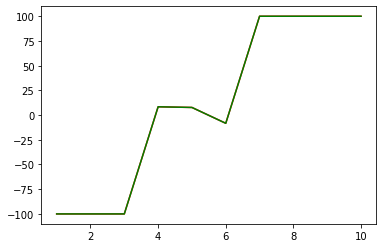

PSO values  [-100.0, -100.0, -100.0, 8.389699999999998, 7.7181999999999995, -8.314699999999998, 100.0, 100.0, 100.0, 100.0] -310.0
Optimal Values [-100.0, -100.0, -100.0, 8.3897, 7.7182, -8.3147, 100.0, 100.0, 100.0, 100.0] -310.0
ITERATION N° 2


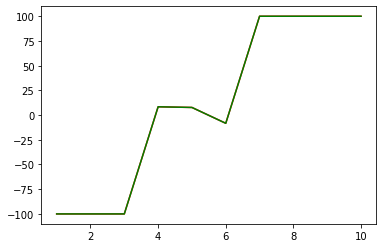

PSO values  [-100.0, -100.0, -100.0, 8.389700000000003, 7.718199999999999, -8.3147, 100.0, 100.0, 100.0, 100.0] -310.0
Optimal Values [-100.0, -100.0, -100.0, 8.3897, 7.7182, -8.3147, 100.0, 100.0, 100.0, 100.0] -310.0
ITERATION N° 3


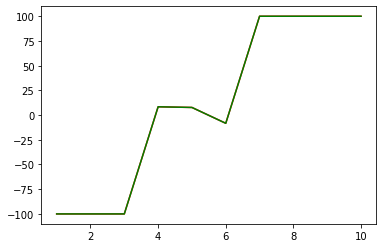

PSO values  [-100.0, -100.0, -100.0, 8.389700000000023, 7.718199999999933, -8.314699999999965, 100.0, 100.0, 100.0, 100.0] -309.99999999999636
Optimal Values [-100.0, -100.0, -100.0, 8.3897, 7.7182, -8.3147, 100.0, 100.0, 100.0, 100.0] -310.0
ITERATION N° 4


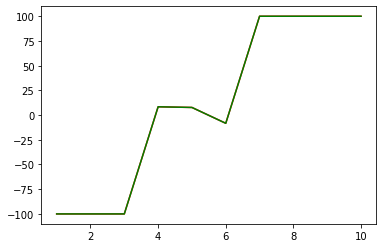

PSO values  [-100.0, -100.0, -100.0, 8.389699999999994, 7.718199999999994, -8.314700000000009, 100.0, 100.0, 100.0, 100.0] -310.0
Optimal Values [-100.0, -100.0, -100.0, 8.3897, 7.7182, -8.3147, 100.0, 100.0, 100.0, 100.0] -310.0
ITERATION N° 5


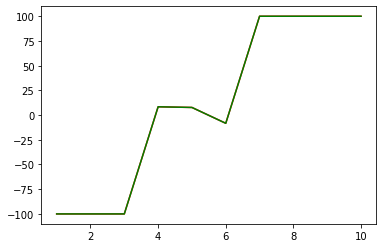

PSO values  [-100.0, -100.0, -100.0, 8.389699999999998, 7.7182, -8.314700000000007, 100.0, 100.0, 100.0, 100.0] -310.0
Optimal Values [-100.0, -100.0, -100.0, 8.3897, 7.7182, -8.3147, 100.0, 100.0, 100.0, 100.0] -310.0
ITERATION N° 6


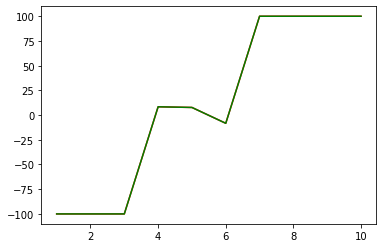

PSO values  [-100.0, -100.0, -100.0, 8.389699999999996, 7.718200000000003, -8.314700000000004, 100.0, 100.0, 100.0, 100.0] -310.0
Optimal Values [-100.0, -100.0, -100.0, 8.3897, 7.7182, -8.3147, 100.0, 100.0, 100.0, 100.0] -310.0
ITERATION N° 7


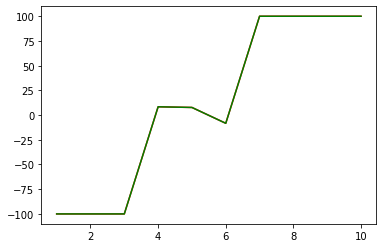

PSO values  [-100.0, -100.0, -100.0, 8.389699999999996, 7.718199999999996, -8.314700000000006, 100.0, 100.0, 100.0, 100.0] -310.0
Optimal Values [-100.0, -100.0, -100.0, 8.3897, 7.7182, -8.3147, 100.0, 100.0, 100.0, 100.0] -310.0
ITERATION N° 8


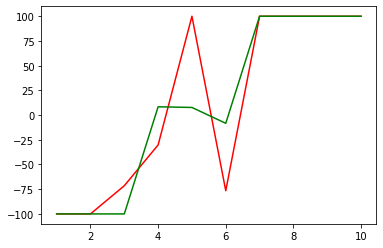

PSO values  [-100.0, -100.0, -71.48130097546208, -30.21198083189951, 100.0, -76.53005188117321, 100.0, 100.0, 100.0, 100.0] 4574.700891929377
Optimal Values [-100.0, -100.0, -100.0, 8.3897, 7.7182, -8.3147, 100.0, 100.0, 100.0, 100.0] -310.0
ITERATION N° 9


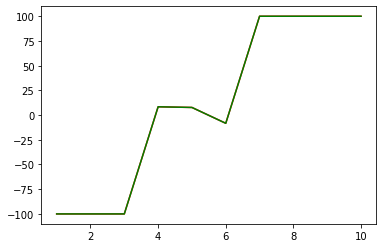

PSO values  [-100.0, -100.0, -100.0, 8.389699999999994, 7.718200000000006, -8.314699999999998, 100.0, 100.0, 100.0, 100.0] -310.0
Optimal Values [-100.0, -100.0, -100.0, 8.3897, 7.7182, -8.3147, 100.0, 100.0, 100.0, 100.0] -310.0
ITERATION N° 10


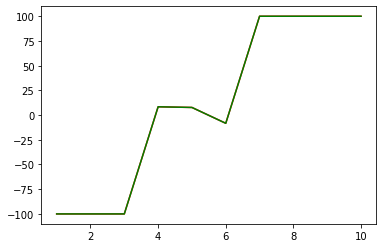

PSO values  [-100.0, -100.0, -100.0, 8.389699999999994, 7.718200000000008, -8.314700000000002, 100.0, 100.0, 100.0, 100.0] -310.0
Optimal Values [-100.0, -100.0, -100.0, 8.3897, 7.7182, -8.3147, 100.0, 100.0, 100.0, 100.0] -310.0


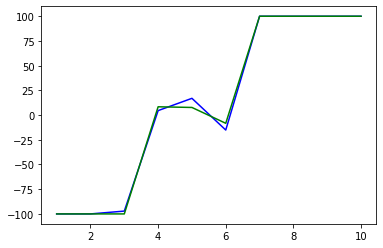


 Sum Best Individual Values [-100.0, -100.0, -97.14813009754621, 4.529531916810049, 16.946379999999994, -15.13623518811732, 100.0, 100.0, 100.0, 100.0]
Individual Optimal Values [-100.0, -100.0, -100.0, 8.3897, 7.7182, -8.3147, 100.0, 100.0, 100.0, 100.0]

 Sum Best objective Values 178.47008919293802
Objective Optimal Values -310.0

 MIRE after 10 Iterations :  [0.0, 0.0, 0.2851869902453785, -0.3860168083189951, 0.9228179999999995, -0.682153518811732, 0.0, 0.0, 0.0, 0.0] 
 SUM MIRE TOTAL 0.13983466311465087

 MDO after 10 Iterations :  488.470089192938


In [23]:
MeanPSO = [0 for _ in range(1)for _ in range(Dim)]
MeanPSOobj = 0
MIREsum = 0
for i in range(10):
  print("ITERATION N°",i+1)
  Best,T = PSO(Swarmsize, Alpha, Beta, Gamma, Delta, Epsilon, bound, maxiteration, Informants, Dim)
  a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
  plt.plot(a, Best.phenome, color='red')
  plt.plot(a, T[0].phenome,color = "green")
  plt.show()
  print("PSO values ",Best.phenome,Best.objective_values)
  print("Optimal Values",T[0].phenome,T[0].objective_values)
  for j in range(Dim):
    MeanPSO[j] += Best.phenome[j]
  MeanPSOobj += Best.objective_values

MeanPSO = [k/10 for k in MeanPSO]
MIRE = [(k-l)/10 for k,l in zip( MeanPSO, T[0].phenome)]
MDO = MeanPSOobj/10 - T[0].objective_values
for i in MIRE:
    MIREsum += i
MeanPSOobj = MeanPSOobj / 10
plt.plot(a, MeanPSO,'blue')
plt.plot(a, T[0].phenome,color = "green")
plt.show()
print("\n Sum Best Individual Values",MeanPSO)
print("Individual Optimal Values", T[0].phenome)
print("\n Sum Best objective Values",MeanPSOobj)
print("Objective Optimal Values", T[0].objective_values)
print("\n MIRE after 10 Iterations : ", MIRE,"\n SUM MIRE TOTAL", MIREsum )
print("\n MDO after 10 Iterations : ", MDO)